In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("LinkedIn_Jobs_Data_India.csv")
df.head()
df.info()
df.isnull().sum()
df.drop_duplicates(inplace=True)
df.dropna(subset=['Job Title', 'Skills', 'Location'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            949 non-null    int64 
 1   id                    949 non-null    int64 
 2   publishedAt           857 non-null    object
 3   Job Title             949 non-null    object
 4   companyName           949 non-null    object
 5   postedTime            949 non-null    object
 6   applicationsCount     949 non-null    int64 
 7   Skills                949 non-null    object
 8   contractType          860 non-null    object
 9   experienceLevel       949 non-null    object
 10  workType              860 non-null    object
 11  sector                860 non-null    object
 12  companyId             949 non-null    int64 
 13  Location              949 non-null    object
 14  state                 871 non-null    object
 15  recently_posted_jobs  949 non-null    ob

In [12]:
df['Skills'] = df['Skills'].apply(lambda x: [s.strip() for s in x.split(',')] if isinstance(x, str) else [])

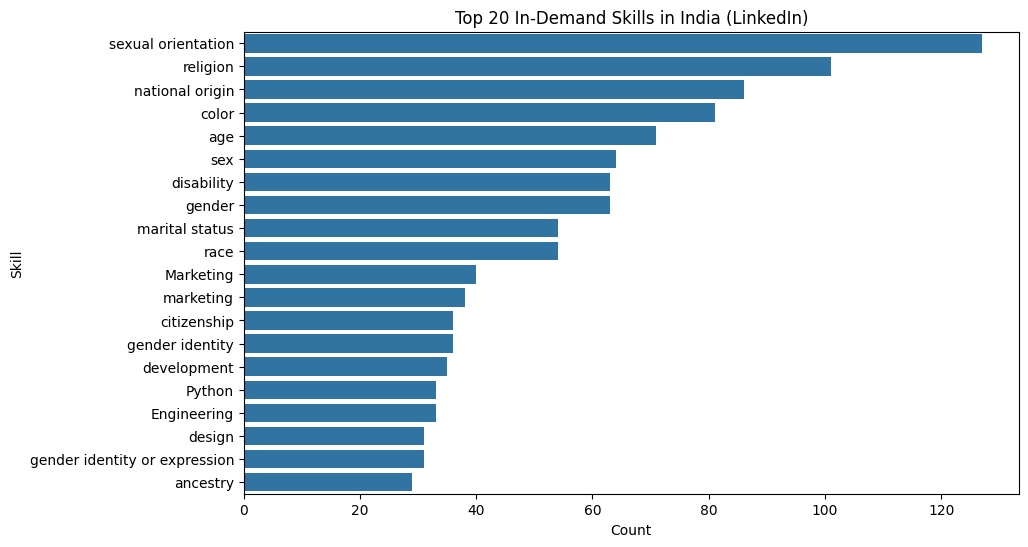

In [13]:
from collections import Counter
all_skills = [skill for sublist in df['Skills'] for skill in sublist]
skill_counts = pd.DataFrame(Counter(all_skills).most_common(20), columns=['Skill', 'Count'])
plt.figure(figsize=(10,6))
sns.barplot(y='Skill', x='Count', data=skill_counts)
plt.title("Top 20 In-Demand Skills in India (LinkedIn)")
plt.show()

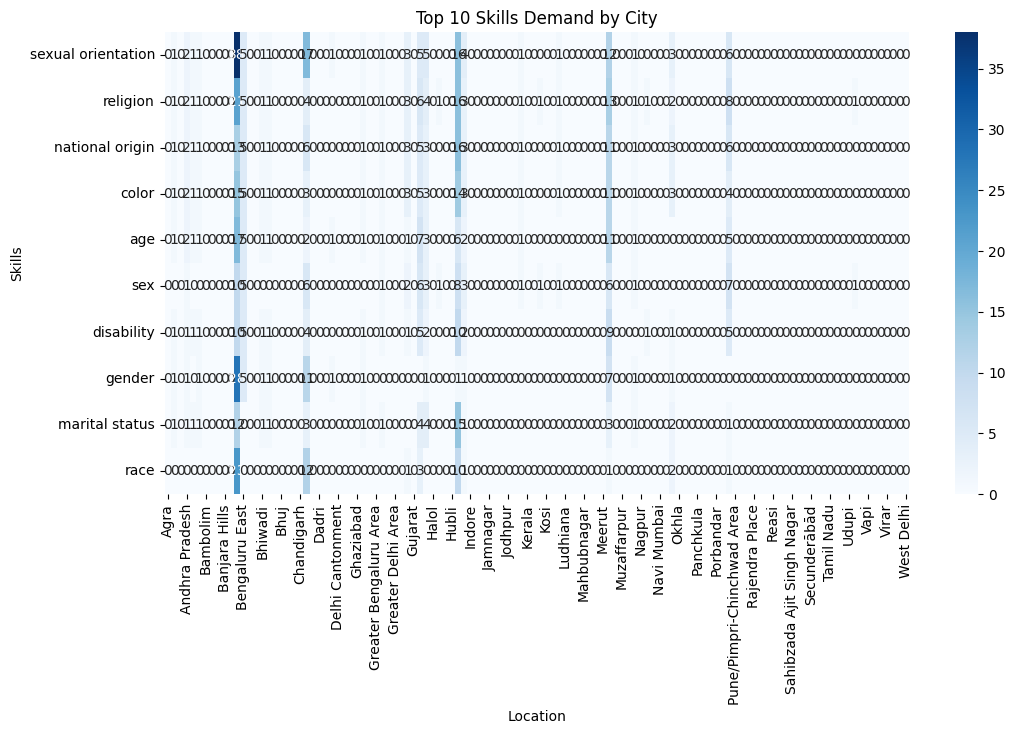

In [14]:
city_skill_count = df.explode('Skills').groupby(['Location', 'Skills']).size().reset_index(name='Count')
pivot_table = city_skill_count.pivot_table(values='Count', index='Skills', columns='Location', fill_value=0)
top_skills = skill_counts['Skill'].head(10)
heatmap_data = pivot_table.loc[top_skills]
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True)
plt.title("Top 10 Skills Demand by City")
plt.show()

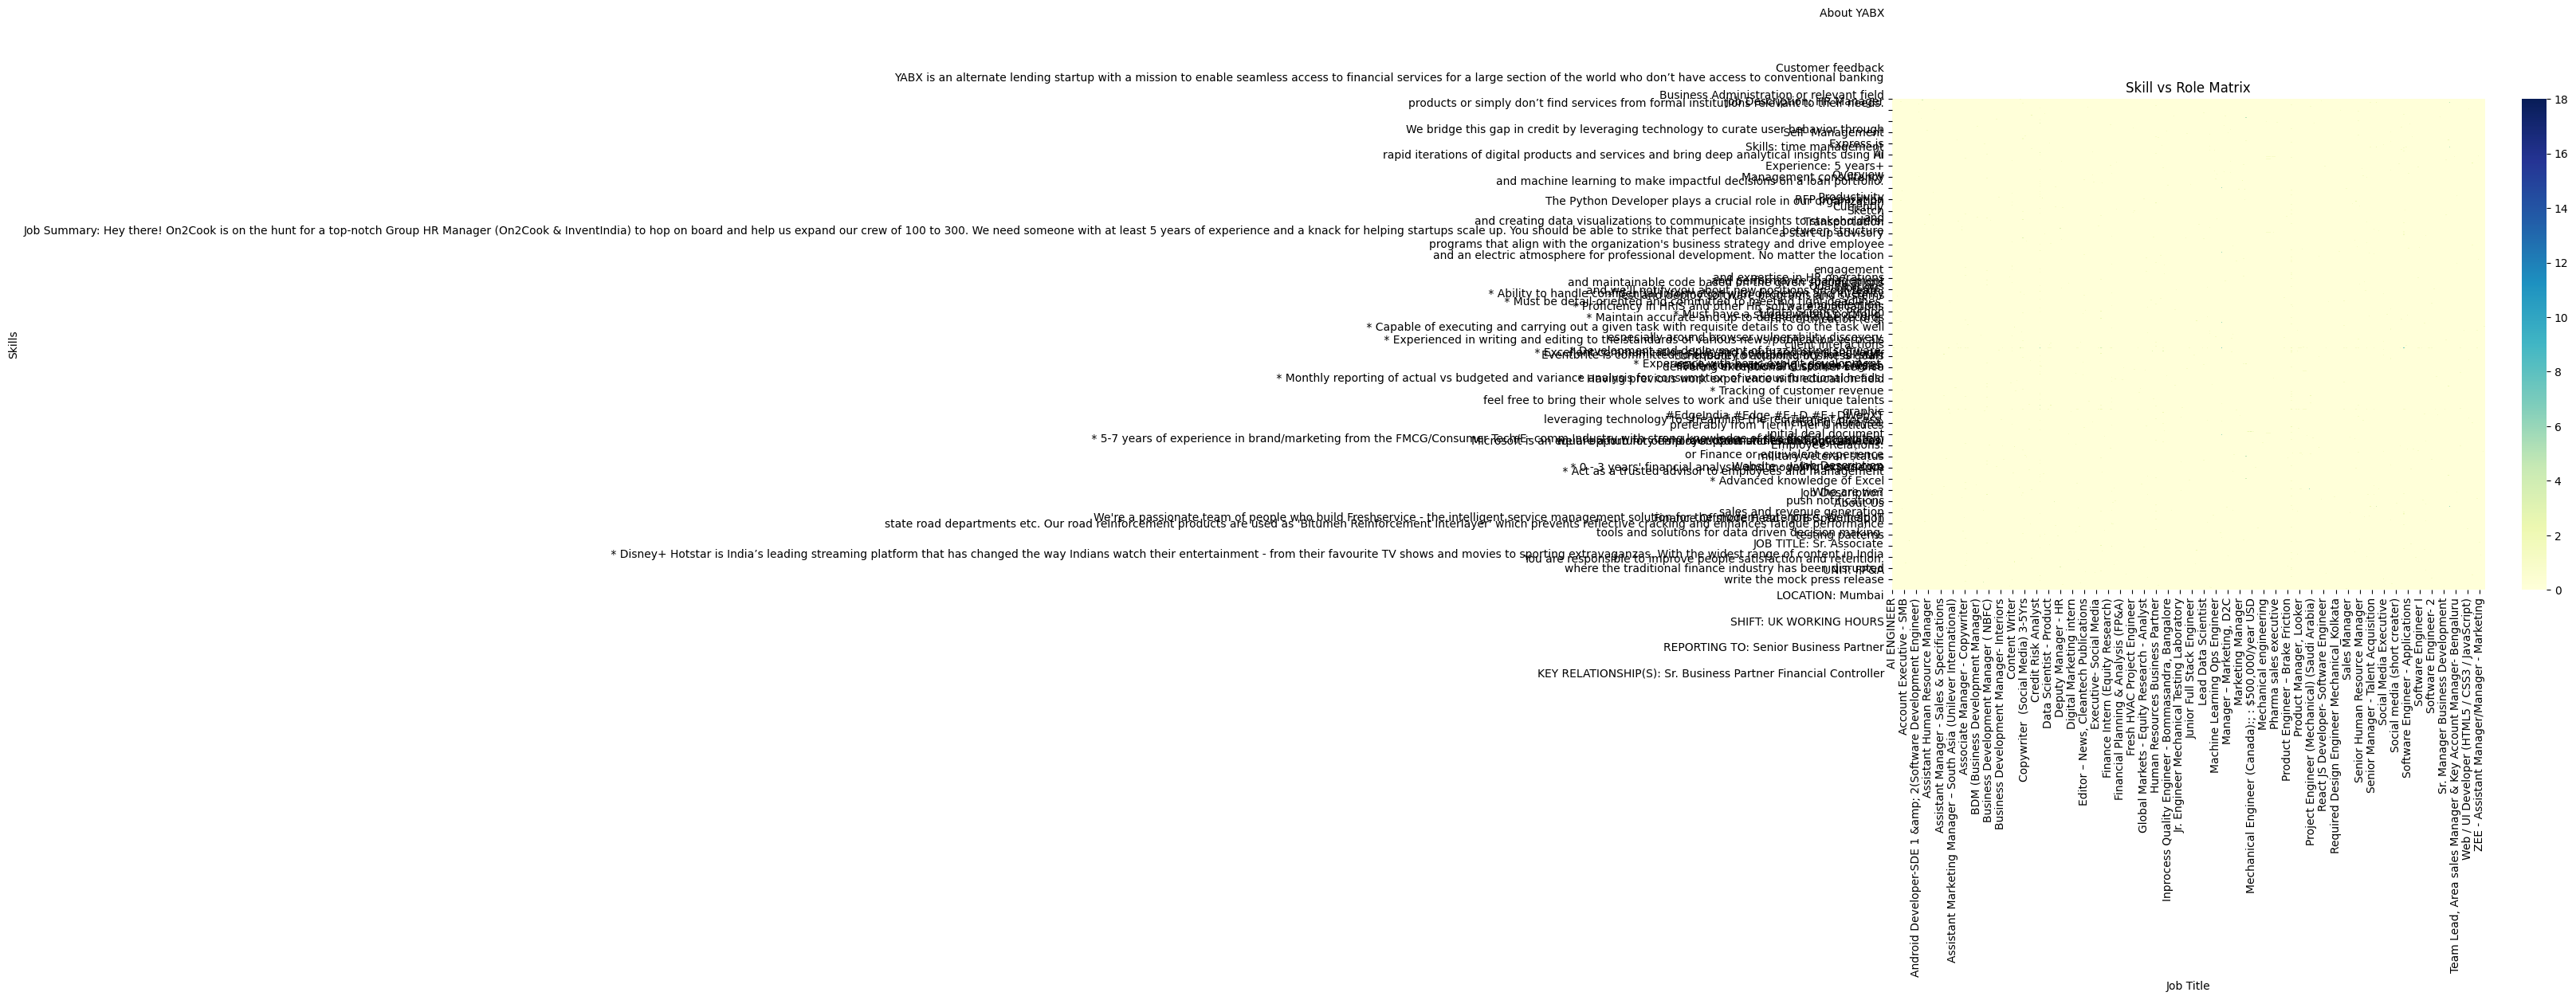

In [15]:
role_skill = df.explode('Skills').groupby(['Job Title', 'Skills']).size().reset_index(name='Count')
matrix = role_skill.pivot_table(values='Count', index='Skills', columns='Job Title', fill_value=0)
plt.figure(figsize=(12,8))
sns.heatmap(matrix, cmap='YlGnBu')
plt.title("Skill vs Role Matrix")
plt.show()

In [17]:
top_roles = df['Job Title'].value_counts().head(10)
top_cities = df['Location'].value_counts().head(10)
top_skills = skill_counts.head(10)
print("Top 10 Job Roles:\n", top_roles)
print("\nTop 10 Cities for Job Demand:\n", top_cities)
print("\nTop 10 In-Demand Skills:\n", top_skills)

Top 10 Job Roles:
 Job Title
Data Scientist                      47
Product Manager                     35
Business Development Manager        28
Content Writer                      22
Financial Analyst                   20
Copywriter                          19
Mechanical Design Engineer          18
Software Engineer                   18
Human Resources Business Partner    17
Human Resources Manager             16
Name: count, dtype: int64

Top 10 Cities for Job Demand:
 Location
Bengaluru    196
Mumbai       123
Gurugram      67
Pune          62
Hyderabad     54
Chennai       42
Noida         31
India         30
Gurgaon       25
Delhi         24
Name: count, dtype: int64

Top 10 In-Demand Skills:
                 Skill  Count
0  sexual orientation    127
1            religion    101
2     national origin     86
3               color     81
4                 age     71
5                 sex     64
6          disability     63
7              gender     63
8      marital status     54
9

In [18]:
with pd.ExcelWriter("LinkedIn_Job_Trend_Analysis.xlsx") as writer:
    skill_counts.to_excel(writer, index=False, sheet_name="Top_Skills")
    city_skill_count.to_excel(writer, index=False, sheet_name="City_Skill_Trend")
    role_skill.to_excel(writer, index=False, sheet_name="Role_Skill_Matrix")